In [1]:
import pandas as pd
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
sentences = pd.read_csv("/data/semeval-2020/task-11/processed/sentence_dataset_v2.csv")

In [3]:
sentences.head()

,article_id,sentence_id,sentence,has_propaganda,cleaned_sentence
0,762956953,0,Iran Admits To Aiding Al-Qaeda and Facilitatin...,False,Iran Admits To Aiding Al-Qaeda and Facilitatin...
1,762956953,1,But now we have definitive confirmation.,False,But now we have definitive confirmation.
2,762956953,2,It was Iran Bush should have invaded after 9/1...,False,It was Iran Bush should have invaded after 9/1...
3,762956953,3,"Now consider this: even though, as President o...",False,"Now consider this: even though, as President o..."
4,762956953,4,The Iran nuclear deal should never have procee...,True,The Iran nuclear deal should never have procee...


In [4]:
# sentences[["label","text"]].to_csv("/data/semeval-2020/task-11/processed/cleaned_sentences_altered.csv",index=False)

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

In [6]:
# split = list(StratifiedShuffleSplit(n_splits=1,test_size=0.2).split(sentences,sentences.label))

In [7]:
# for train_ix,test_ix in split:
#     test = sentences.iloc[test_ix]
#     train = sentences.iloc[train_ix]

In [8]:
# test

In [9]:
# sentences.propaganda.value_counts()

In [11]:
from fastai.text import *
arch = AWD_LSTM

In [12]:
# data_lm = TextLMDataBunch.from_df("/data/semeval-2020/task-11/processed/",train_df=train,valid_df=test,text_cols=0)\
#             .label_for_lm()\
#             .databunch(bs=128)\


In [16]:
data_lm = TextLMDataBunch.from_csv(path="/data/semeval-2020/task-11/processed/" , csv_name="sentence_dataset_v2.csv",text_cols="cleaned_sentence",bs=256)

In [17]:
data_lm.show_batch()

idx,text
0,future belonged . xxbos 2 ] xxmaj it ’s notable that these xxunk tantrums from the xxmaj german bishops halted abruptly about the same time as xxmaj cardinal xxmaj kasper gave his infamous xxunk speech in xxmaj february 2014 . xxbos xxmaj she is currently weighing whether she can order a longer delay to give the affected people time to renew their efforts to gain legal status . xxbos xxmaj
1,"says xxmaj joseph . “ xxbos i would like to take this opportunity to make it clear that there is absolutely no place for anti - xxmaj semitism at mcgill xxmaj university and that , as principal and vice - chancellor , i will remain vigilant to ensure that all members of our community feel safe , welcomed and respected on our campuses . ” xxbos xxmaj congo 's xxmaj"
2,"specified , “ xxmaj he that xxunk the name of the xxmaj lord , dying let him die : all the multitude shall stone him , whether he be a native or a stranger ” ( xxmaj lev . xxbos xxmaj on the other hand , every xxmaj republican publicly stated that they would vote xxmaj yes . xxbos xxmaj as his lawyer told reporters , xxmaj strzok had “"
3,"there are better , more venerable , even more xxunk and xxunk works on the xxmaj eucharist in the canon of “ official ” things . xxbos “ xxmaj we take anti - xxmaj semitism quite seriously , ” j xxmaj street ’s statement read . “ xxbos xxmaj comey ’s follow - up letters to xxmaj congress on xxmaj october 28 and xxmaj november 6 , 2016 were similarly"
4,"the teachings xxunk the xxmaj holy xxmaj scriptures and stand and fight . xxbos xxmaj recall that this was the very first airplane interview , on the trip back to xxmaj rome from xxmaj world xxmaj youth xxmaj day in xxmaj rio , a matter of weeks after his election . xxbos xxmaj it is very deep . xxbos xxmaj here 's an example of his work : xxmaj perhaps"


In [18]:
data_lm.batch_size

256

In [19]:
learn = language_model_learner(data_lm,arch,drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02
Min loss divided by 10: 3.63E-02


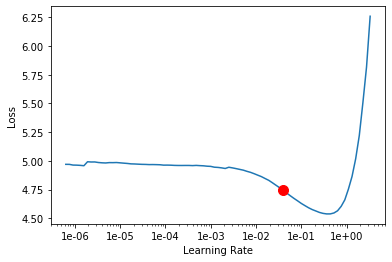

In [20]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [21]:
learn.fit_one_cycle(12,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.852383,4.554474,0.255590,00:05
1,4.574463,4.066745,0.293415,00:05
2,4.213915,3.688742,0.328832,00:05
3,3.868766,3.551249,0.349312,00:05
4,3.577636,3.508106,0.354288,00:05
5,3.336817,3.495104,0.358305,00:05
6,3.144381,3.493442,0.359617,00:05
7,2.976618,3.498295,0.360166,00:05
8,2.838465,3.502730,0.360705,00:06
9,2.752300,3.505326,0.360947,00:06


In [22]:
learn.save('first_fit_lm')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-04
Min loss divided by 10: 7.59E-04


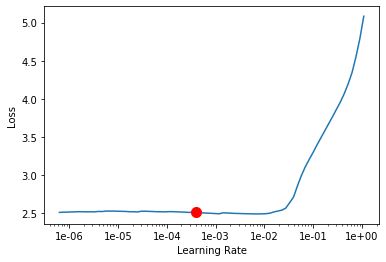

In [23]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [25]:
# learn.load('first_fit_lm')
learn.fit_one_cycle(16,1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,2.513657,3.507400,0.360965,00:07
1,2.508812,3.519851,0.360621,00:08
2,2.485095,3.521100,0.361449,00:08
3,2.460942,3.521227,0.362891,00:08
4,2.442078,3.522479,0.363495,00:07
5,2.424534,3.521351,0.363597,00:07
6,2.400064,3.525789,0.364118,00:08
7,2.379006,3.530280,0.364183,00:08
8,2.352985,3.530806,0.364537,00:08
9,2.327047,3.537474,0.364249,00:08


In [26]:
learn.save_encoder('fine_tuned')

In [27]:
data = TextClasDataBunch.from_csv("/data/semeval-2020/task-11/processed/",
                                  'sentence_dataset_v2.csv',vocab=data_lm.vocab,
                                  text_cols="cleaned_sentence",label_cols="has_propaganda",
                                  bs=256)
data.show_batch()

text,target
xxbos xxup breaking xxup news : xxup trump xxup tells xxup jeff xxup sessions xxup to xxup put xxup an xxup end xxup to xxup russia xxup probe xxup as xxup he xxup claims xxup prosecutors xxup doing xxup mueller xxup ’s ‘ xxup dirty xxup work xxup are a xxup disgrace’ xxup to xxup america xxmaj white xxmaj house xxup xxunk say if xxmaj trump will order xxmaj jeff,True
xxbos xxmaj galatians xxunk - 9 ) xxmaj the signatories go on to give voice to the utter scandal of the pope ’s failure to carry out his xxunk mission as the xxmaj vicar of xxmaj christ to call home the members of the xxmaj islamic faith : xxmaj the pro - xxmaj islam speech of xxmaj your xxmaj holiness leads us to xxunk the fact that xxmaj muslims are,True
"xxbos xxup capitol xxup police xxup accidentally xxup gave xxup evidence xxup to xxup house xxup hacking xxup suspect xxup ’s xxup defense xxup attorney xxmaj by xxmaj luke xxmaj rosiak on xxmaj may 24 , 2018 : xxmaj the xxmaj house xxup ig said xxmaj democratic xxup it aides made unauthorized access to data , but prosecutors have n’t charged them xxmaj democrats appear to want to keep the",True
"xxbos xxmaj some four months before xxmaj archbishop xxmaj viganò ’s testimony xxmaj cardinal xxmaj xxunk xxmaj xxunk xxmaj xxunk , the xxmaj archbishop of xxmaj xxunk , xxmaj netherlands , perhaps the most liberal territory in the entire xxmaj church , protested that xxmaj bergoglio ’s blatant xxunk to xxunk with xxmaj xxunk in xxmaj germany means that “ the bishops and , above all , the xxmaj successor",True
"xxbos xxmaj supporting xxmaj local xxmaj efforts to xxmaj reduce and xxmaj combat xxmaj gun xxmaj crimes , including : xxmaj opposing concealed carry xxunk policies and legislation that would xxunk city policies established to protect residents ; xxmaj providing local governments and law enforcement officials access to xxup xxunk gun trace data ; xxmaj opposing "" xxmaj stand xxmaj your xxmaj xxunk or "" xxmaj shoot xxmaj xxunk laws",False


In [28]:
data.batch_size

256

In [29]:
data.classes

[False, True]

In [30]:
# data_clas.vocab.itos = data_lm.vocab.itos

In [31]:
learn = text_classifier_learner(data, AWD_LSTM,drop_mult=0.3)

In [32]:
learn.load_encoder('fine_tuned')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (12447 items)
x: TextList
xxbos xxmaj no , no , no , no .,xxbos xxmaj this is why confidence tricksters can be successful , why lying works for getting what you want ; people do n’t see it coming .,xxbos xxmaj the xxmaj kennedy xxmaj autopsy xxmaj jacob xxmaj hornberger xxmaj check xxmaj amazon for xxmaj pricing .,xxbos xxmaj and xxmaj king had observed that in his xxmaj july 5 , 2016 statement , xxmaj james xxmaj comey used “ intent ” six times .,xxbos xxmaj archbishop xxmaj xxunk xxmaj xxunk , xxmaj president of the xxmaj xxunk xxmaj bishops ' xxmaj conference and archbishop of xxmaj bratislava , told xxmaj die xxmaj tagespost that xxmaj veritatis xxmaj splendor is not only still valid , but shows xxunk truths .
y: CategoryList
False,False,False,False,False
Path: /data/semeval-2020/task-11/processed;

Valid: LabelList (3113 items)
x: TextList
xxbos xxmaj yes , xxmaj francis should resign if xxmaj viganò ’s allegations are true , xx

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-02
Min loss divided by 10: 2.09E-02


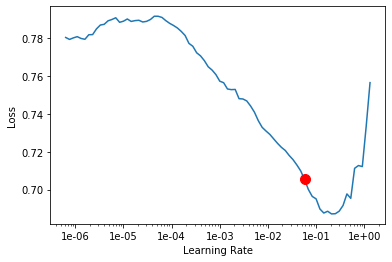

In [33]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [34]:
learn.fit_one_cycle(16,1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.668669,0.605285,0.680373,00:04
1,0.614265,0.559636,0.719884,00:04
2,0.570731,0.554227,0.718278,00:05
3,0.551110,0.548155,0.724060,00:04
4,0.545356,0.544265,0.732412,00:04
5,0.537472,0.544938,0.730806,00:04
6,0.527405,0.543813,0.726309,00:04
7,0.520255,0.540083,0.723097,00:04
8,0.514258,0.555069,0.727915,00:04
9,0.502073,0.565332,0.720848,00:04
